In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')


In [ ]:
# Mnist veriseti yükle
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim seti boyu",x_train.shape,y_train.shape)

Eğitim seti boyu (60000, 28, 28) (60000,)


In [ ]:
print("Test seti boyu",x_test.shape,y_test.shape)

Test seti boyu (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train))

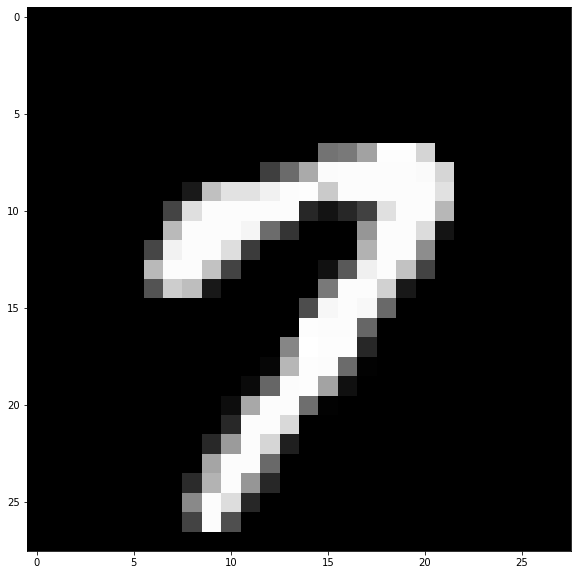

In [ ]:
# Verisetinden örnekler
plt.figure(figsize=(10,10))
plt.imshow(x_train[15],cmap="gray")

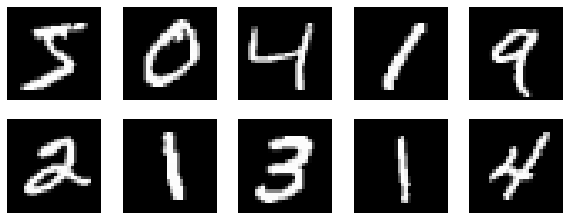

In [ ]:
# 10 tane aynı anda yazdırma
plt.figure(figsize=(10,10))
for n in range(10):
  plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap="gray"),plt.axis('off')

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    plt.subplot(5,5,n+1)
    plt.imshow(data[n],cmap="gray"),plt.axis('off')


In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[2][10,10]

0

In [ ]:
x_train[2].mean() # ortalaması

24.799744897959183

In [ ]:
x_train[2].sum() # toplamı

19443

In [ ]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [ ]:
# pixxelleri görselleştirme
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap="gray")
  width , height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y],2)),xy=(y,x),color="white" if img[x][y]<threshold else "black")

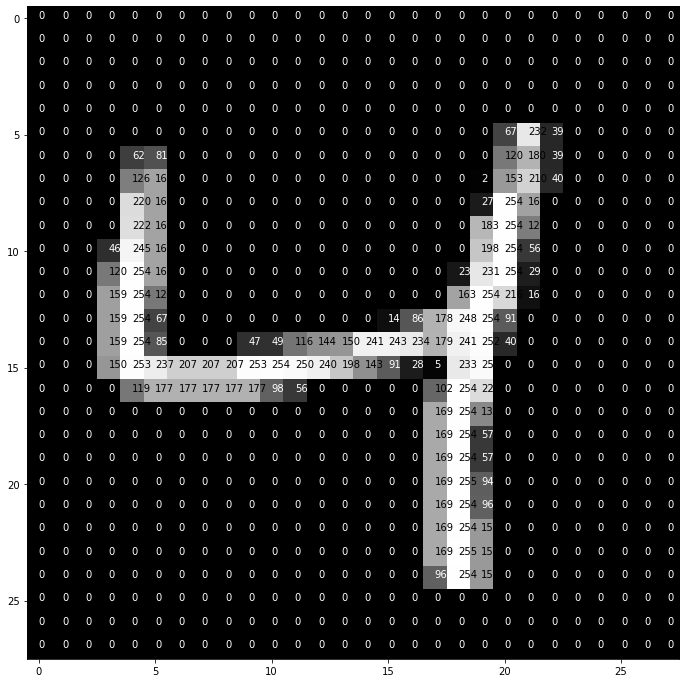

In [ ]:
pixel_visualize(x_train[2])

## Encoding
* Öncesi = [0 1 2 3 4 5 6 7 8 9]
* Sonrası = [ 0 0 1 0 0 0 0 0 0 0]

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Reshaping

In [ ]:
img_size = x_train.shape[1]

In [ ]:
img_size

28

In [16]:
print("X boyutumuz",x_train.shape)
print("X boyutumuz",x_test.shape)

X boyutumuz (60000, 28, 28)
X boyutumuz (10000, 28, 28)


In [19]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [20]:
print("X boyutumuz",x_train.shape)
print("X boyutumuz",x_test.shape)

X boyutumuz (60000, 28, 28, 1)
X boyutumuz (10000, 28, 28, 1)


## Standardization

In [21]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Modelleme (Modeling)
 ## Sinir ağ mimarisi tanımlamak

In [25]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=10,activation='softmax',name='output')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])



In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3563 - precision_1: 0.9452 - recall: 0.8505 - accuracy: 0.9032 - val_loss: 0.2002 - val_precision_1: 0.9567 - val_recall: 0.9283 - val_accuracy: 0.9434
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1709 - precision_1: 0.9622 - recall: 0.9413 - accuracy: 0.9513 - val_loss: 0.1470 - val_precision_1: 0.9658 - val_recall: 0.9486 - val_accuracy: 0.9581
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1232 - precision_1: 0.9720 - recall: 0.9576 - accuracy: 0.9648 - val_loss: 0.1143 - val_precision_1: 0.9729 - val_recall: 0.9608 - val_accuracy: 0.9666
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0945 - precision_1: 0.9780 - recall: 0.9679 - accuracy: 0.9726 - val_loss: 0.1042 - val_precision_1: 0.9746 - val_recall: 0.9663 - val_accuracy: 0.9700
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0754 - precision_

In [28]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0629 - precision_1: 0.9851 - recall: 0.9786 - accuracy: 0.9819 - val_loss: 0.0811 - val_precision_1: 0.9787 - val_recall: 0.9725 - val_accuracy: 0.9748
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0514 - precision_1: 0.9875 - recall: 0.9832 - accuracy: 0.9852 - val_loss: 0.0779 - val_precision_1: 0.9785 - val_recall: 0.9724 - val_accuracy: 0.9749
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0436 - precision_1: 0.9897 - recall: 0.9859 - accuracy: 0.9878 - val_loss: 0.0766 - val_precision_1: 0.9795 - val_recall: 0.9739 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0369 - precision_1: 0.9915 - recall: 0.9883 - accuracy: 0.9898 - val_loss: 0.0714 - val_precision_1: 0.9798 - val_recall: 0.9750 - val_accuracy: 0.9771
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0309 - preci

# Model Başarısını Değerlendirme(Evalution)

In [29]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0107 - precision_1: 0.9984 - recall: 0.9977 - accuracy: 0.9980 - val_loss: 0.0750 - val_precision_1: 0.9794 - val_recall: 0.9766 - val_accuracy: 0.9773
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0099 - precision_1: 0.9983 - recall: 0.9978 - accuracy: 0.9980 - val_loss: 0.0808 - val_precision_1: 0.9785 - val_recall: 0.9758 - val_accuracy: 0.9764
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0090 - precision_1: 0.9984 - recall: 0.9980 - accuracy: 0.9982 - val_loss: 0.0752 - val_precision_1: 0.9799 - val_recall: 0.9775 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0068 - precision_1: 0.9990 - recall: 0.9987 - accuracy: 0.9989 - val_loss: 0.0770 - val_precision_1: 0.9793 - val_recall: 0.9769 - val_accuracy: 0.9776
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0069 - preci

In [38]:
#######Accuracy ve Loss grafikleri ################

# accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accucary',fontsize=16)
plt.ylim([min(plt.ylim()),1)])
plt.title("Eğitim ve test başarı grafiği",fontsize=16)

# accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.legend(loc='upper rigth')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accucary',fontsize=16)
plt.ylim([min(plt.ylim(),1)])
plt.title("Eğitim ve test başarı grafiği",fontsize=16)

SyntaxError: ignored

In [39]:
model.save('mnist_model.h5')

In [40]:
import random

random_sayi = random.randint(0,x_test.shape[0])

In [42]:
random_sayi

3954

In [43]:
test_img = x_test[random_sayi]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f959887a150>)

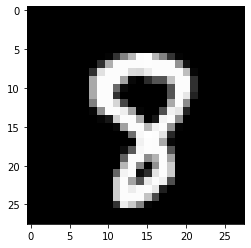

In [47]:
y_test[random_sayi] #8 yani
plt.figure(),plt.imshow(test_img.reshape(28,28),cmap='gray')

In [48]:
test_data = x_test[random_sayi].reshape(1,28,28,1)

In [49]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 77ms/step


In [50]:
probability

array([[1.5165472e-10, 1.3994688e-14, 2.7916676e-06, 1.1302109e-04,
        1.0692589e-14, 8.6938999e-06, 8.9998599e-18, 1.0544371e-08,
        9.9987245e-01, 2.9842561e-06]], dtype=float32)

In [51]:
predicted_class = np.argmax(probability)


In [52]:
predicted_class

8